### imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Loading step

Synthetic Transactions: https://www.kaggle.com/ntnu-testimon/paysim1

In [4]:
# Load file
dataset = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

# Remove types that never are fraud
dataset = dataset.loc[dataset['type'] != 'PAYMENT']
dataset = dataset.loc[dataset['type'] != 'DEBIT']
dataset = dataset.loc[dataset['type'] != 'CASH_IN']

# Maps domain to numbers
dataset = dataset.replace("TRANSFER", 0)
dataset = dataset.replace("CASH_OUT", 1)

### Sample the data

In [45]:
trainset = dataset.sample(frac=0.01)
testset = dataset.sample(frac=0.01)

### Train dataset information

In [46]:
train_qtd = trainset.shape[0]
train_fraud_qtd = len(list(filter(lambda x: x == 1, trainset['isFraud'])))
train_nonfraud_qtd = len(list(filter(lambda x: x == 0, trainset['isFraud'])))
train_proportion = train_fraud_qtd / train_qtd

print('train_total:', train_qtd)
print('train_fraud:', train_fraud_qtd)
print('train_nonfraud', train_nonfraud_qtd)
print('train_fraud proportion', train_proportion)
trainset.head()

train_total: 27704
train_fraud: 75
train_nonfraud 27629
train_fraud proportion 0.002707190297429974


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1240571,134,1,107193.87,C1571655690,0.00,0.0,C1490390160,717083.28,824277.15,0,0
5175269,359,1,67995.71,C1602394502,8490.76,0.0,C2038912826,386435.62,454431.33,0,0
5125679,356,1,46235.89,C1865090461,1633.57,0.0,C1477365256,1787695.51,1833931.40,0,0
1786155,162,1,155645.91,C462053144,145.00,0.0,C434947415,0.00,155645.91,0,0
3914307,284,1,36408.08,C660678666,10538.00,0.0,C271159667,0.00,36408.08,0,0


### Test dataset information

In [47]:
test_qtd = testset.shape[0]
test_fraud_qtd = len(list(filter(lambda x: x == 1, testset['isFraud'])))
test_nonfraud_qtd = len(list(filter(lambda x: x == 0, testset['isFraud'])))
test_proportion = test_fraud_qtd / test_qtd

print('test_total:', test_qtd)
print('test_fraud:', test_fraud_qtd)
print('test_nonfraud', test_nonfraud_qtd)
print('test_fraud proportion', test_proportion)
testset.head()

test_total: 27704
test_fraud: 93
test_nonfraud 27611
test_fraud proportion 0.003356915968813168


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1617833,157,1,37300.06,C1905248132,0.0,0.00,C1873365591,800426.82,837726.88,0,0
2788803,215,1,10415.32,C569203596,136655.0,126239.68,C1055370907,3732.47,14147.79,0,0
5850296,402,1,248101.45,C1984589861,0.0,0.00,C260300844,11617437.89,11865539.33,0,0
4053715,300,1,571659.60,C1753701776,0.0,0.00,C104905172,7003771.63,7575431.23,0,0
125073,11,1,342008.21,C477250605,0.0,0.00,C1365259363,596894.75,938902.97,0,0


### Divide Fraud x NonFraud

In [48]:
train_frauds = trainset.loc[trainset['isFraud'] == 1]
train_non_frauds = trainset.loc[trainset['isFraud'] == 0]

### Labs

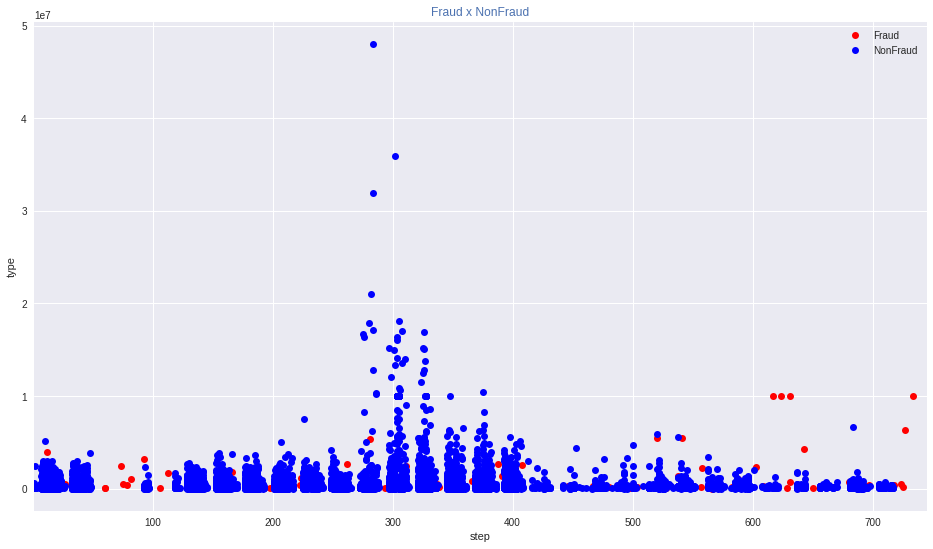

In [49]:
def plot(x_value, y_value, z_value):
    mpl.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(16, 9))

    x_fraud = train_frauds[[x_value]]
    y_fraud = train_frauds[[y_value]]
    #z_fraud = train_frauds[[z_value]]

    x_nonfraud = train_non_frauds[[x_value]]
    y_nonfraud = train_non_frauds[[y_value]]
    #z_nonfraud = train_non_frauds[[z_value]]
    
    ax.set_title('Fraud x NonFraud', color='C0')

    ax.plot(x_fraud, y_fraud, 'ro', label='Fraud')
    ax.plot(x_nonfraud, y_nonfraud, 'bo', label='NonFraud')
    
    ax.set_xlabel(x_value)
    ax.set_ylabel(y_value)
    #ax.set_ylabel(z_value)
    
    ax.set_xlim([1, 745])
    #ax.set_xlim([3,27])
    
    ax.legend()
    
plot('step', 'amount', 'type')